In [20]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats

In [ ]:
#1. Is the something that would make a student in the second floor different to those in the first floor?
    # grades = means, means test opposed to corr, students = subset, all students = population, sub v pop = 1 sample, no direct diff: two tail, two tail one ttest
#2. Is there a height difference between adults who drink milk or not?
    # two sub groups, no overlap == two samples, one tail test, independent
#3. Between Texas and Mexico, who has cheeper gas?
    #ontail, asking if its higher to one state, two sample
#4. From the given departments, which one has a higher stress level?
    #means in 3 goups, nnon diretional, use two tests

In [21]:
sale1 = stats.norm(90,15).rvs(40)

sale1 = stats.norm(100,20).rvs(40)

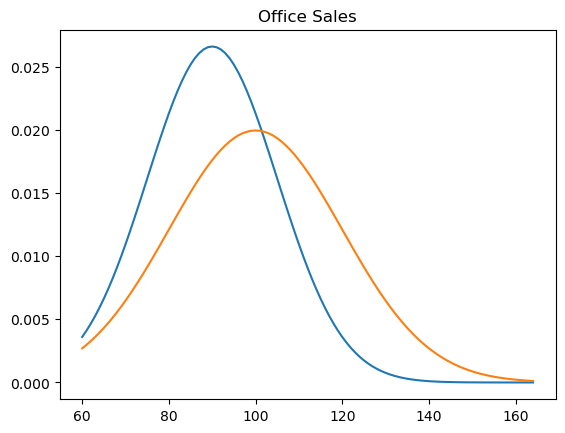

In [22]:
x = np.arange(60,165)
y=stats.norm(90,15).pdf(x)
y2=stats.norm(100,20).pdf(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.title('Office Sales')
plt.show()

In [24]:
#H0:No difference between office 1 and 2
#Ha:Sale time between office one and two
#two tail test, two sample test

In [25]:
sale1mean=90
sale1stdv=15
sale2mean=100
sale2stdv=20

In [31]:
t_stat,p_val = stats.ttest_ind_from_stats(
    mean1=sale1mean,
    std1=sale1stdv,
    nobs1=40,
    mean2=sale2mean,
    std2=sale2stdv,
    nobs2=50)

In [28]:
α=.05

In [34]:
if p_val < α:
    print('reject hypothesis')
else:
    print('reject hypothesis failed')

reject hypothesis


In [33]:
mpg = data('mpg')

In [35]:
mpg['fe']=stats.hmean((mpg['hwy'],mpg['cty']))

In [36]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [ ]:
#h0:there is no difference
#ha:there is a difference

In [37]:
fe1999=mpg[mpg.year==1999].fe
fe2008=mpg[mpg.year==2008].fe

(array([23., 24., 17., 31., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([12.69230769, 15.3218111 , 17.95131451, 20.58081792, 23.21032132,
        25.83982473, 28.46932814, 31.09883155, 33.72833496, 36.35783836,
        38.98734177]),
 <BarContainer object of 10 artists>)

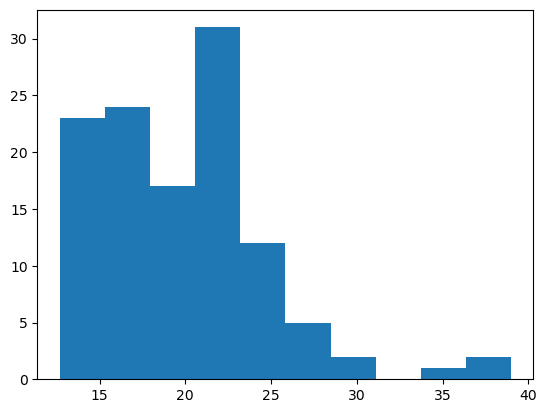

In [39]:
plt.hist(fe1999)

(array([ 7., 10., 25., 12., 16., 19., 20.,  3.,  3.,  2.]),
 array([10.28571429, 12.44483516, 14.60395604, 16.76307692, 18.9221978 ,
        21.08131868, 23.24043956, 25.39956044, 27.55868132, 29.7178022 ,
        31.87692308]),
 <BarContainer object of 10 artists>)

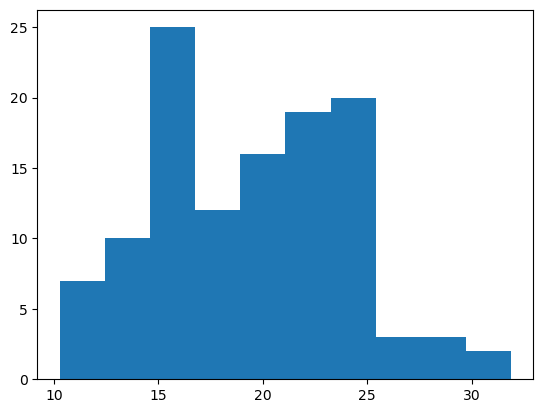

In [40]:
plt.hist(fe2008)

In [42]:
stat, p_val =stats.levene(fe1999,fe2008)
p_val < α

False

In [43]:
t_stat,p_val = stats.ttest_ind(fe1999,fe2008)
p_val < α

False

In [44]:
# Uncertain difference between the two.

In [45]:
#h0:compact cars have a lower or equal fuel efficiancy to other cars
#ha:compact have better fuel effeciancy

In [46]:
μth = mpg.fe.mean()

In [47]:
t_stat,p_val = stats.ttest_1samp(
    mpg[mpg['class']=='compact'].fe,
    μth)

In [48]:
if (p_val/2)<α and (t_stat>0):
    print('reject hypothesis')
else:
    print('reject hypothesis failed')

reject hypothesis


In [ ]:
#uncertain between the two

In [49]:
#h0: manual are no better than automatic in gas
#ha:manual cats are better than automatic in gas

In [50]:
manual = mpg[mpg.trans.str.startswith('man')].fe
auto = mpg[mpg.trans.str.startswith('auto')].fe

In [51]:
stats.levene(manual,auto)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [53]:
t_stat,p_val = stats.ttest_ind(manual,auto)

In [54]:
p_val

5.510464610044009e-06

In [55]:
t_stat

4.652577547151351

In [ ]:
# we reject h0